In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
df = pd.read_csv("weight-height (1).csv")

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df.shape

(8555, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [8]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [13]:
df = df.rename(columns={'Gender':'gender','Height':'height','Weight':'weight'})

In [14]:
df.columns

Index(['gender', 'height', 'weight'], dtype='object')

In [15]:
df['gender'].value_counts()

gender
Male      5000
Female    3555
Name: count, dtype: int64

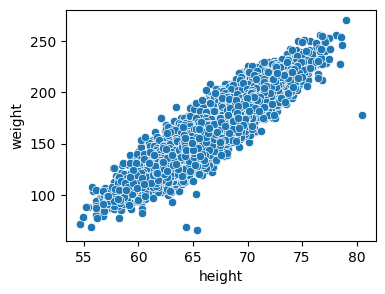

In [16]:
#visualisation
plt.figure(figsize=(4,3))
sns.scatterplot(x='height',y='weight', data=df)
plt.show()

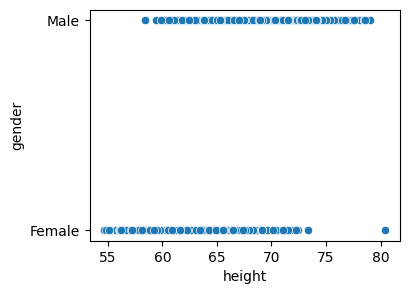

In [17]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='height',y='gender', data=df)
plt.show()

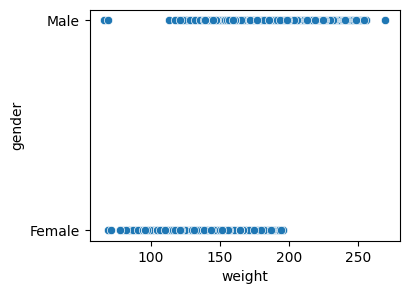

In [18]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='weight',y='gender', data=df)
plt.show()

In [ ]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='weight',y='gender', data=df)
plt.show()